Testing a Perceptual Phenomenon
Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

1. What is our independent variable? What is our dependent variable? (Question 1: Identify variables in the experiment - Question response correctly identifies the independent and dependent variables in the experiment.)

The independent variables are the conditions the tests are conducted under, including the choices made for ink colors used for the words. The dependent variable is the time it takes to name the ink colors. 

2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices. (Question 2a: Establish hypotheses -  Null and alternative hypotheses are clearly stated in words and mathematically. Symbols in the mathematical statement are defined.) (Question 2b: Establish a statistical test - A statistical test is proposed which will distinguish the proposed hypotheses. Any assumptions made by the statistical test are addressed.)

Hypothesis - the population mean times for naming the incongruent color words will be longer than the times for the congruent color words. This is the alternative hypothesis because there is expected to be an observed effect in the task. The null hypothesis is that there will be no change in population mean reading times between the congruent and incongruent word lists.

Ho: $\mu$c == $\mu$i

Ha: $\mu$c != $\mu$

Explanation of symbols:

Ho - null hypothesis

Ha - alternative hypothesis

$\mu$c - congruent color words mean

$\mu$i - incongruent color words mean

The statistical test that will be used is a paired t-test. This will be used because we are comparing the results from two similar tests (but not exactly the same) using the same participants. Also, this is a small sample size, if it were larger a z-test would have been more appropriate. An f-test is not used because we are comparing the means of related sample data, not the equality between two populations.

Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. (Question 3: Report descriptive statistics -  Descriptive statistics, including at least one measure of centrality and one measure of variability, have been computed for the dataset’s groups.)

In [31]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [6]:
stroop_data = pd.read_csv('stroopdata.csv')
display(stroop_data)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


The complete Stroop dataset showing all the conguent and incongruent results.

In [8]:
np.mean(stroop_data.Congruent)

14.051125000000004

In [9]:
np.mean(stroop_data.Incongruent)

22.01591666666667

In [10]:
np.median(stroop_data.Congruent)

14.3565

In [94]:
np.median(stroop_data.Incongruent)

21.0175

In [92]:
np.std([stroop_data.Congruent], ddof=1)

3.5593579576451955

In [95]:
np.std([stroop_data.Incongruent], ddof=1)

4.797057122469138

These are some descriptive statistics for the dataset, including measures of central tendency and variability. This includes the mean, median, and standard deviation of the congurent and incongruent data in the Stroop dataset. 

4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots. (Question 4: Plot the data -  One or two visualizations have been created that show off the data, including comments on what can be observed in the plot or plots.)

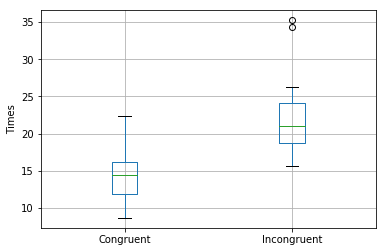

In [26]:
stroop_data.boxplot()
plt.ylabel('Times')
plt.show()

I used a box plot because it provides an easy way to show the two sets of data on the same graph. This comparison of the two results in the Stroop data set shows that many of the times in the incongruent tests were longer than the times in the conguent tests. 

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations? (Question 5: Perform the statistical test and interpret your results - A statistical test has been correctly performed and reported, including test statistic, p-value, and test result. The test results are interpreted in terms of the experimental task performed. Alternatively, students may use a bootstrapping approach to simulate the results of a traditional hypothesis test.)

In [96]:
congruent_mean = np.mean(stroop_data.Congruent)
incongruent_mean = np.mean(stroop_data.Incongruent)
num_pairs = 23

In [97]:
squared_diff = sum([(stroop_data.Congruent[i]-stroop_data.Incongruent[i])**2 for i in range(num_pairs)])
sum_diff = sum([stroop_data.Congruent[i]-stroop_data.Incongruent[i] for i in range(num_pairs)])
std = np.sqrt((squared_diff-(sum_diff**2/num_pairs))/(num_pairs-1))
stand_error = std/np.sqrt(num_pairs)
std, stand_error

(4.936324179702406, 1.0292947439264175)

Standard deviation between the two means is 4.936324179702406

Standard error between the two means is 1.0292947439264175

In [55]:
t_test = (congruent_mean - incongruent_mean)/stand_error
t_test

-7.738105837676418

The t-test result is -7.738105837676418

In [98]:
degrees_freedom = num_pairs-1

In [99]:
acceptable_var = 0.05
critical_value = stats.t.ppf(1.0 - acceptable_var, degrees_freedom)
critical_value

1.717144374380242

The critical statistic value is 1.717144374380242

In [100]:
p = 1 - stats.t.cdf(t_test,degrees_freedom)
p

0.9999999489404029

The p-value is 0.9999999489404029

The t-test value is well beyond the critical statistic value when compared. I believe the results of testing lead to rejecting the null hypothesis, thus leaving the alternative hypothesis. This result does support my expectations laid out at the beginning of this examination. 

6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions! (Question 6: Digging deeper and extending the investigation Question 6 is optional and does not need to be answered in order to meet project specifications. - Hypotheses regarding the reasons for the effect observed are presented. An extension or related experiment to the performed Stroop task is provided, that may produce similar effects.)

Resources:

    https://www.thoughtco.com/null-hypothesis-vs-alternative-hypothesis-3126413
    
    https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/
    
    https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
    
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html